<a href="https://colab.research.google.com/github/eeuunnjjiii/Project1_Meal-kit/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전처리

In [ ]:
import pandas as pd
df = pd.read_csv('total_data.csv', index_col=0)
token = pd.read_csv('total_token.csv', index_col=0)

In [ ]:
print(df.shape)

(1691, 13)


## 1. 한글 표시사항 이미지 > 텍스트 변환

In [ ]:
# pytesseract library 이용
!pip install pytesseract
!sudo apt install tesseract-ocr
!sudo apt-get install tesseract-ocr-kor

In [ ]:
from PIL import Image
import cv2
import pytesseract
import requests
import numpy as np
from google.colab.patches import cv2_imshow

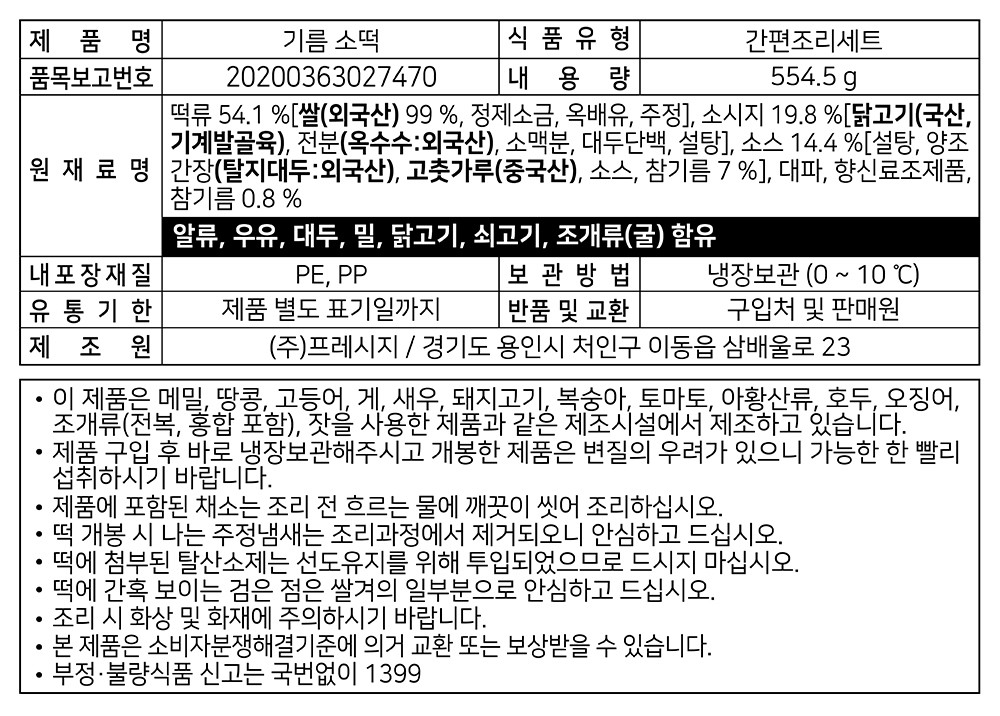

In [ ]:
# 예시 이미지 - 한글 표시사항
im = Image.open(requests.get(df.ingre_image[1], stream=True).raw)
im

In [ ]:
# 예시 - 이미지 > 텍스트

image_nparray = np.asarray(bytearray(requests.get(df.ingre_image[1]).content), dtype=np.uint8)
image = cv2.imdecode(image_nparray, cv2.IMREAD_GRAYSCALE)
text = pytesseract.image_to_string(image, lang='kor')
print(text)

 

제 품 명    기름 소떡     품유

프

간편조리세트

 

 

0무| 한

 

으
품목보고번호     20200363027470     내 용            554.5 0
떡류 54.1 %[쌀(외국산) 99 % 정제소금 옥배유, 주정] 소시지 19.8 %[닭고기(국산,
기계발골육), 전분(옥수수:외국산),소맥분, 대두단백, 설탕], 소스 14.4 %[설탕, 양조
원 재 료 명 | 간장(탈지대두:외국산), 고추가루(중국산), 소스, 참기름 7 %], 대파, 향신료조제품,
참기름 0.8 %

 

 

 

 

 

 

 

 

 

 

 

 

내포장재질          케이          보관방법      냉장보관 (0 ~10 6)

유통 기 한| 제품 별도 표기일까지  |반품 및 교환             입처 및 판매원

제 조 원             (주)프레시지 / 경기도 용인시 처인구 이동읍 삼배울로 23

* 디 제품은 메밀, 망콩, 고등어, 게, 새우, 돼지고기, 복승아, 토마토, 마형산류 호두, 오징어,
조개류(전복, 홍합 포함), 을 사용한 제품과 같은 제조시설에서 제조하고 있습니다.

ㆍ 제품 구입 후 바로 냉장보관해주시고 개봉한 제품은 변질의 우려가 있으니 가능한 한 빨리
섭취하시기 바랍니다.

ㆍ제품에 포함된 채소는 조리 전 흐르는 물에 깨끗이 써 조리하십시오.
* 떡 개봉 시 나는 주정냄새는 조리과정에서 제거되오니 브8아본  드십시오.
떡에 첨 첨부된 탈산소제는 선도유지를 위해 투입되었으므로 드시지 마십시오.

 

,              ~ 1
ㆍ 떡에 간흑 보이는 검은 점은 쌀겨의 일부분으로 안심하고 드십시오.

조리 시 화상 및 화재에 주의하시기 바랍니다.
본 제품은 소비자분쟁해결기준에 의거 교환 또는 보상받을 수 있습니다.

왼 조는

부정ㆍ불량식품 신고는 국번없이 1399

 

 



## 2. 태깅 - 재료명 / 리뷰 토큰화

### 1) 재료명 토큰화

In [ ]:
!pip install konlpy
from konlpy.tag import Okt  
okt=Okt()

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 86 kB 4.5 MB/s 
     |████████████████████████████████| 448 kB 48.3 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
# 불용어 제거 후 토큰화 하는 함수
import re
def text_stem(text, stopwords, okt):
    token = okt.pos(text)
    clean_words=[]
    for word in token:
      if word[1] in ['Noun'] and word[0] not in stopwords:
        clean_words.append(word[0])
    return clean_words

In [ ]:
# 재료명 불용어 지정
stopwords = ['밀', '키트', '개', '재료', '정보', '품명','고객','센터','외국산','개봉','푸드','주식회사','포장','보관','반품','유통','제조','기준','번호','원산지','상품','상이',
             '출고','고시','브랜드','거래','참조','품질','위원회','표기','보상','공정','이상','함유','직사','직사광선','폴리', '산', '식품', '제품', '및', '조리','교환', '품목', 
             '방법', '유형', '냉장', '보고', '소비자', '판매원', '시설', '오징어', '재질', '조개류', '섭취', '부정', '신고', '국번', '의거', '입처', '혼합', '후', '경기도', 
             '불량', '정', '류', '가루', '향', '용량', '제수', '고등어', '대파', '호주', '대두', '분쟁해결', '닭고기', '사용', '가공품', '전복', '나트륨', '홍합', '메밀', '포함',
             '복숭아', '도표', '전분', '냉동', '함량', '아황산', '바로', '제', '조미', '시기', '수령', '주', '용기', '번길', '기타', '우려', '해주시',  '기한', '변질', '맛', 
             '분말', '탈지', '복합', '증진', '알류', '등', '주정', '국산', '국내', '호두', '쇠고기', '중국산', '미국','게']

In [ ]:
# 간단한 전처리
regex = '[^\w\.\%()/,-]'
text = text.replace(r'\n', '')
text = re.sub(regex, '', text)
text = text.split('내용')[1].split('내포장')[0]
print(text)

554.50떡류54.1%쌀(외국산)99%정제소금옥배유,주정소시지19.8%닭고기(국산,기계발골육),전분(옥수수외국산),소맥분,대두단백,설탕,소스14.4%설탕,양조원재료명간장(탈지대두외국산),고추가루(중국산),소스,참기름7%,대파,향신료조제품,참기름0.8%


In [ ]:
# 토큰화
print(text_stem(text, stopwords, okt))

['떡류', '쌀', '정제', '소금', '옥배유', '소시지', '계발', '골육', '옥수수', '소맥분', '단백', '설탕', '소스', '설탕', '간장', '고추', '소스', '참기름', '향신료', '참기름']


### 2) 리뷰 토큰화

In [ ]:
# 불용어, 특수문자 제거 후 토큰화 하는 함수
def text_stem(text,stopwords, okt):
    
    txt = re.sub('[^가-힣a-z]', ' ', text)
    token = okt.pos(txt, stem=True)
    clean_words=[]
    for word in token:
      if word[0] not in stopwords and word[1] in ['Noun', 'Adjective']:
        clean_words.append(word[0])
        
    return clean_words

In [ ]:
# '한국어불용어100'으로 불용어 지정
stop = pd.read_csv('stopwords.txt', sep='\t', header=None)
stopwords = stop[0].to_list()

In [ ]:
# 리뷰 데이터는 네이버, 이마트몰, 쿡킷에서만 수집
text = df.iloc[100].reviews
print(text_stem(text, stopwords, okt))

['역시', '금', '돼지', '식당', '역시', '피', '코크', '김치찌개', '여기', '뼈', '냄비', '염도', '꼭', '중탕', '담번', '금', '돼지', '식당', '햄', '다가', '투척', '맛있다', '구매', '있다', '김치', '두부', '추가', '짐', '맛있다', '유명하다', '금', '돼지', '식당', '궁금하다', '햇습니', '맛있다', '기대하다', '피', '코크', '국물', '요리', '맛', '좋다', '실하다', '돼지', '식당', '김치찌개', '처음', '맛있다', '듯', '고기', '정말', '많다', '맛있다', '기대하다', '상품', '크게', '다르다', '마트', '김치찌개', '제일', '맛있다', '같다', '내용물', '고기', '적당하다', '있다', '국물', '맛', '감', '평이', '좋다', '구매', '괜찮다', '맛', '가끔', '반찬', '없다', '좋다', '자극', '맛있다', '리뷰', '불호', '많다', '걱정', '저', '괜찮다', '다만', '단독', '먹기', '아쉽다', '품절', '자주', '맛있다', '두부', '먹음', '좋다', '간편', '조리', '김치찌개', '제일', '맛있다', '같다', '맛', '있다', '양', '별하나', '맛있다', '간단하다', '계란후라이', '김', '김치찌개', '밥', '그릇', '뚝딱', '고수', '맛집', '자주', '구매', '브랜드', '금', '돼지', '식당', '김치찌개', '고기', '많다', '맛있다', '건더기', '많다', '좋다', '저', '싱겁다', '물', '다음', '김치', '없다', '추가', '두부', '끼', '반찬', '괜찮다', '딸', '아이', '유통', '기한', '개월', '이상', '제품', '냉장고', '있다', '짧다', '유통', '기한', '지나', '채', '발견', '종종', '있다', '기한', '여유', '편이', '좋다', '

### 3) 재료 + 리뷰 토큰 -> total_token

In [ ]:
token.head()

,company,title,ingre_token,review_token,data,total_token
0,SSG Fresh,감바스 피칸테,"바게트 빵, 올리브오일, 새우, 스파게티, 대파, 마늘, 건고추, 봉골레 육수, 방...","애슐리,감,바스,밀,키트,괜찮다,탱탱하다,간편하다,감,바스,요리,있다,좋다,새우,채...",emartmall,"바게트 빵, 올리브오일, 새우, 스파게티, 대파, 마늘, 건고추, 봉골레 육수, 방..."
1,기네스,스테이크 버거,"기네스,스테이크,버거,애,포장재,실,므버,어미,바드,오버,버투,마키,느,드,소거,비...","배송,빠르다,상품,좋다",emartmall,"기네스,스테이크,버거,애,포장재,실,므버,어미,바드,오버,버투,마키,느,드,소거,비..."
2,기네스,핫치킨 버거,"다시,태,통,다리,살,패티,팩,기네스,디아블로,소스,팩,기네스,버거,트,레이,각,매...","패티,부드럽다,매콤,온,소스,정말,수제,버거,맛있다,의사,이다,할라피뇨,잔뜩,매콤,...",emartmall,"다시,태,통,다리,살,패티,팩,기네스,디아블로,소스,팩,기네스,버거,트,레이,각,매..."
3,기타,감바스 오일 파스타,"올리브오일, 치킨 육수, 새우, 스파게티, 베트남고추, 방울토마토, 버섯, 마늘, ...","맛있다,파스타,육수,정말,좋다",emartmall,"올리브오일, 치킨 육수, 새우, 스파게티, 베트남고추, 방울토마토, 버섯, 마늘, ..."
4,기타,구수한 버섯 된장찌개,"버섯,된장찌개,유,간편,세트,내용,소스,된장,메주,된장,멸치,액첫,멸치,액젖,베트남...","최악,요,버섯,포장,벌레,정말,실망,이다,찌,맛있다,조리법,필요없다,그대로,끼,해결...",emartmall,"버섯,된장찌개,유,간편,세트,내용,소스,된장,메주,된장,멸치,액첫,멸치,액젖,베트남..."


# EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import matplotlib as mpl
mpl.rc('axes',unicode_minus=False)

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

import seaborn as sns

In [ ]:
!apt-get install fonts-nanum*
!apt-get install fontconfig
import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 40 not upgraded.
Need to get 37.0 MB of archives.
After this operation, 145 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-eco all 1.000-6 [14.0 MB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-extra all 20170925-1 [12.2 MB]
Get:4 http://archive.ubu

## 1. 회사별 분석

In [ ]:
df['company'].value_counts()[:14]

프레시지     569
마이셰프     189
심플리쿡     100
기타        92
애슐리       88
앙트레       72
푸드어셈블     53
피코크       49
잇츠온       31
식스레시피     30
쿡솜씨       29
쿡킷        27
프레시밀      24
곰곰        19
Name: company, dtype: int64

In [ ]:
# 밀키트 10개 이하 업체 : 기타로 분류
company_ls = df['company'].value_counts()[:14]
company_etc=[]
for i in df['company'].to_list():
  if i in company_ls:
    company_etc.append(i)
  else:
    company_etc.append('기타')
df['company_class'] = company_etc

In [ ]:
df.shape

(1691, 14)

In [ ]:
# 중복 제거 데이터프레임
unique = df.drop_duplicates(subset=['title','company'])['company_class'].value_counts().reset_index().sort_values('index')
duplicate = df['company_class'].value_counts().reset_index().sort_values('index')
compare = unique.merge(duplicate, on='index')
compare.index = compare['index']

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


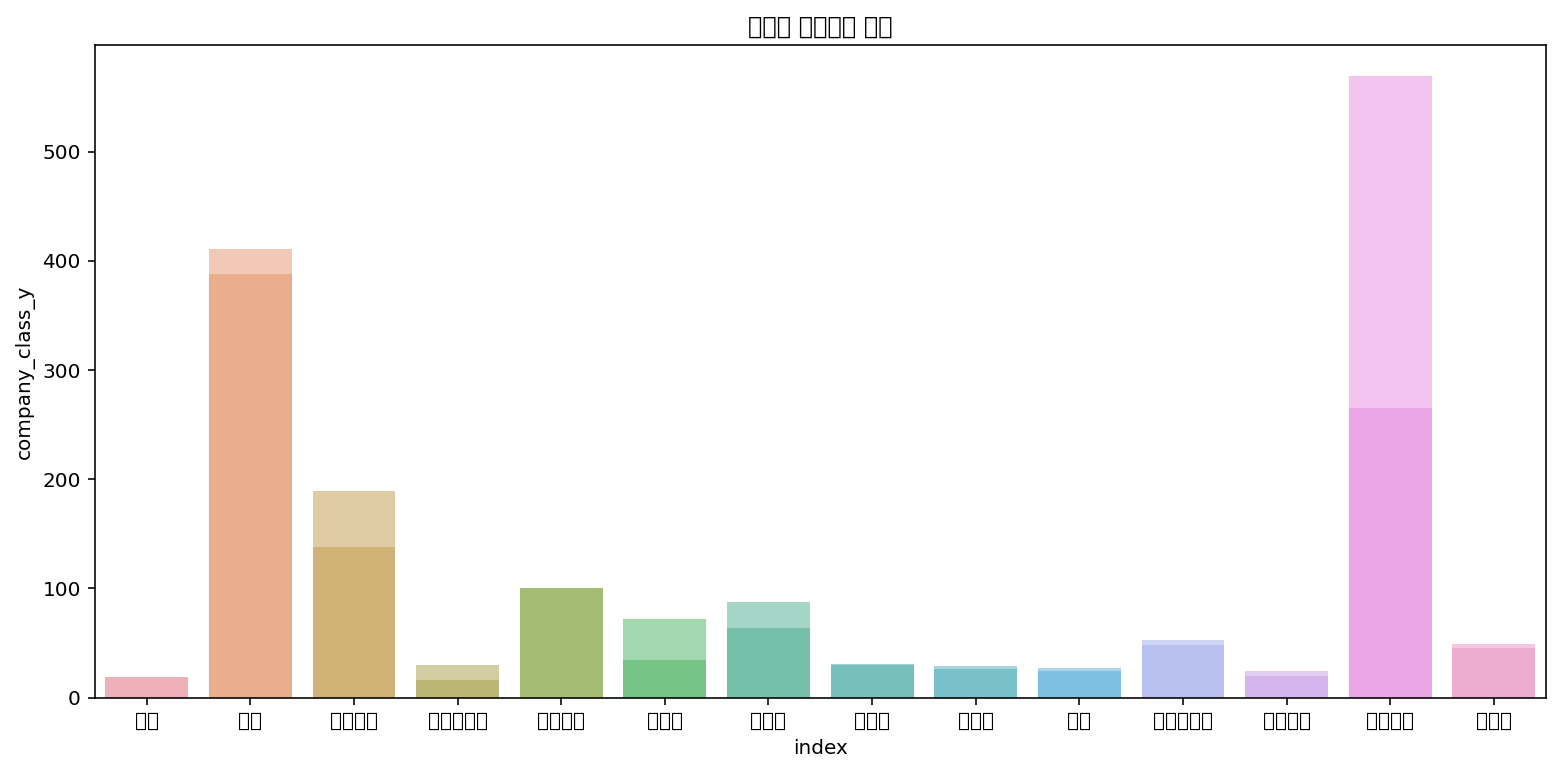

In [ ]:
fig = plt.figure(figsize=(13, 6))
ax = fig.add_subplot(1, 1, 1)
ax = sns.barplot(compare.index,compare.company_class_x, alpha=0.5)
ax = sns.barplot(compare.index,compare.company_class_y,alpha=0.5)
plt.title('회사별 판매되는 상품');

- 프레시지가 압도적으로 많은 상품 판매 중이며, 다양한 채널에서 판매 중이다.
- 심플리쿡은 GS Fresh로만 구매 가능하다.

전체 평균가격 : 13795.34


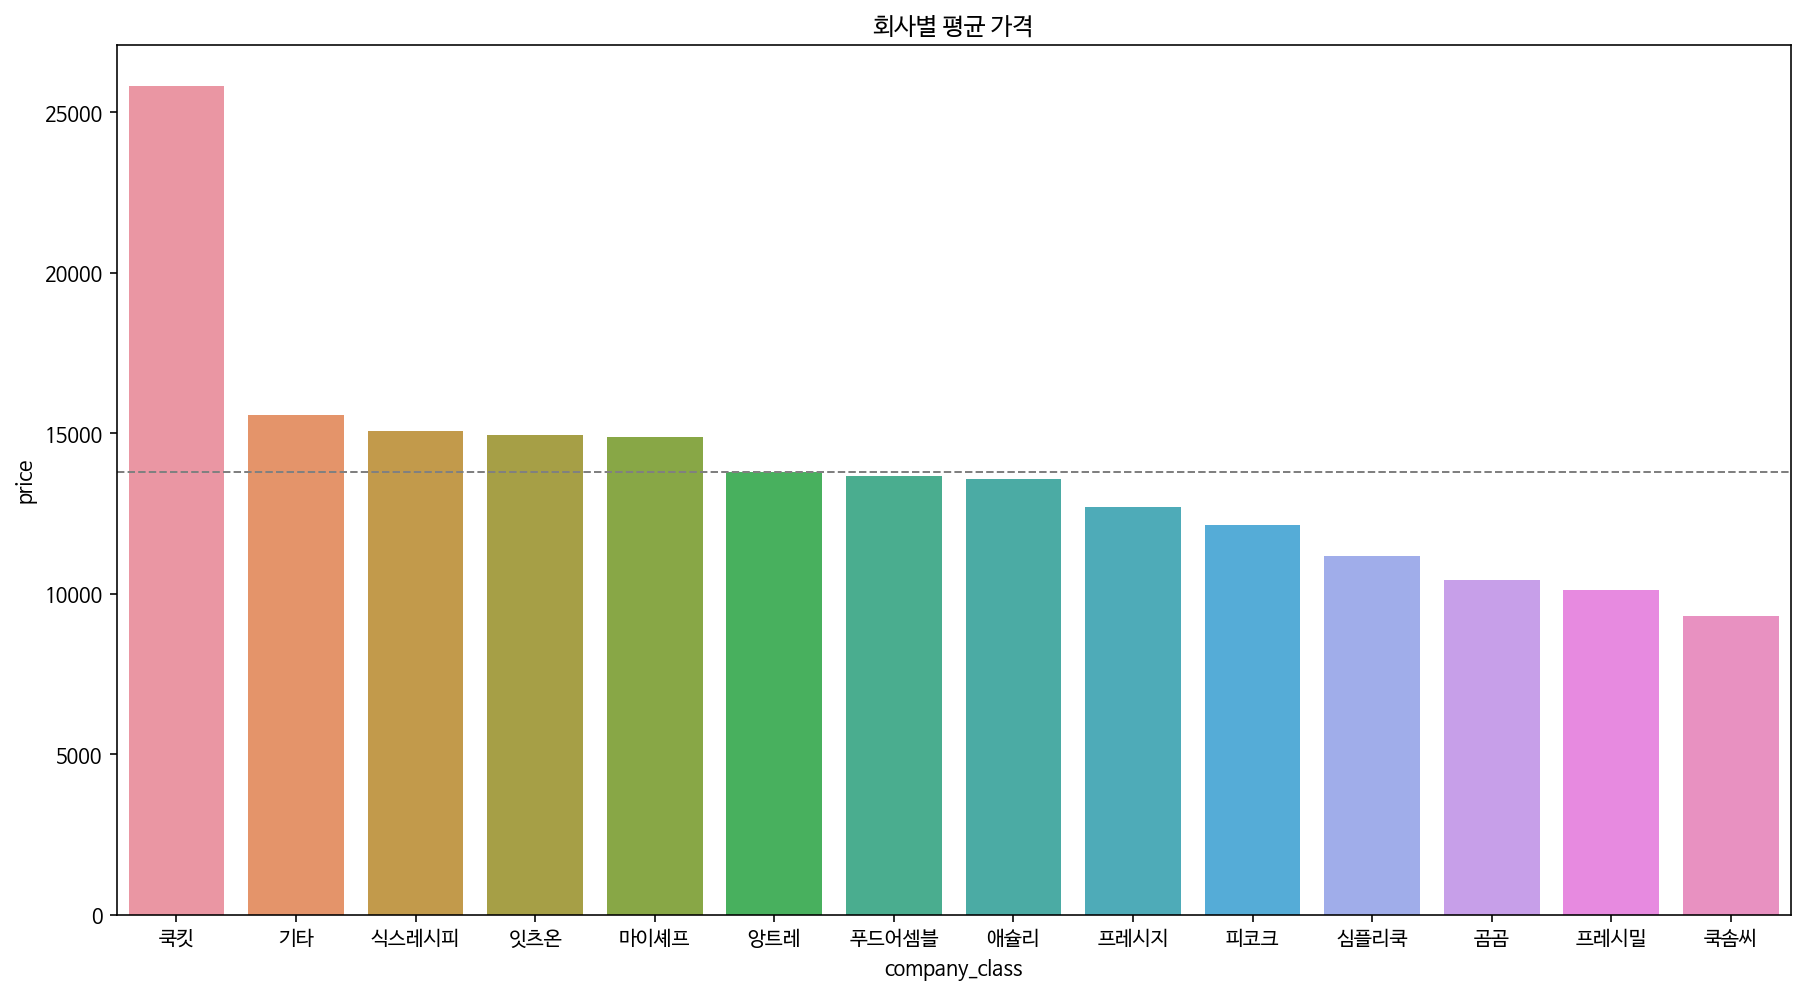

In [ ]:
company_price=df.groupby('company_class').mean().sort_values(by='price', ascending=False).reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x='company_class', y='price', data=company_price)
plt.axhline(company_price.price.mean(), color='gray', linestyle='--', linewidth='1')
plt.title('회사별 평균 가격');
print("전체 평균가격 :",round(company_price.price.mean(),2))

- 쿡킷 밀키트 가격은 평균의 2배 가량

In [ ]:
# 평점=0 제거
new_df = df[df.total_rate > 0]

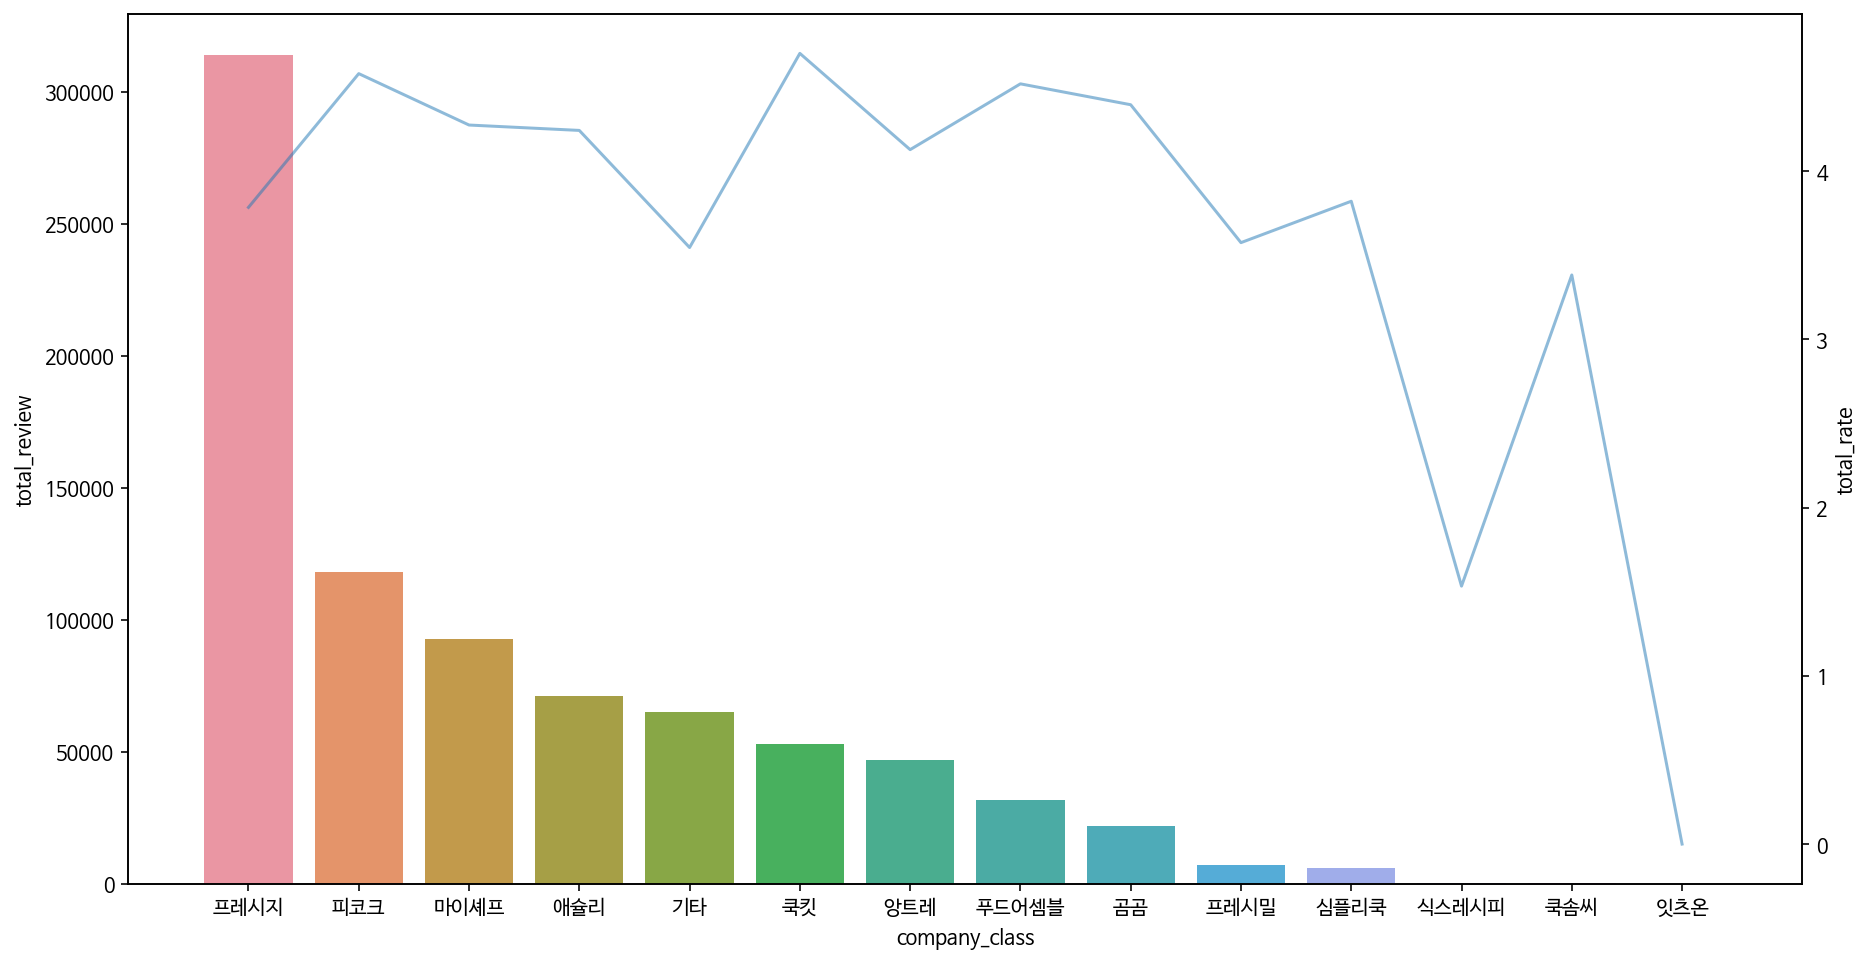

In [ ]:
# 리뷰 전체 개수 + 평점
df1 = new_df.groupby('company_class').agg({'total_rate': 'mean', 'total_review': 'sum'}).reset_index().sort_values(by='total_review', ascending=False)

ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(15,8))

sns.barplot(x='company_class', y='total_review', data=df1, ax=ax1)
ax2 = ax1.twinx()

sns.lineplot(x='company_class', y='total_rate', data=df1, alpha=0.5, ax=ax2);

- 프레시지가 가장 대중화 되어 있음
- 쿡킷의 경우 가격은 비싸지만 프리미엄화 전략으로 고객 만족도가 높은 편
- 이마트몰에서 판매중인 잇츠온은 리뷰데이터가 없음

전체 평균 별점 : 3.77


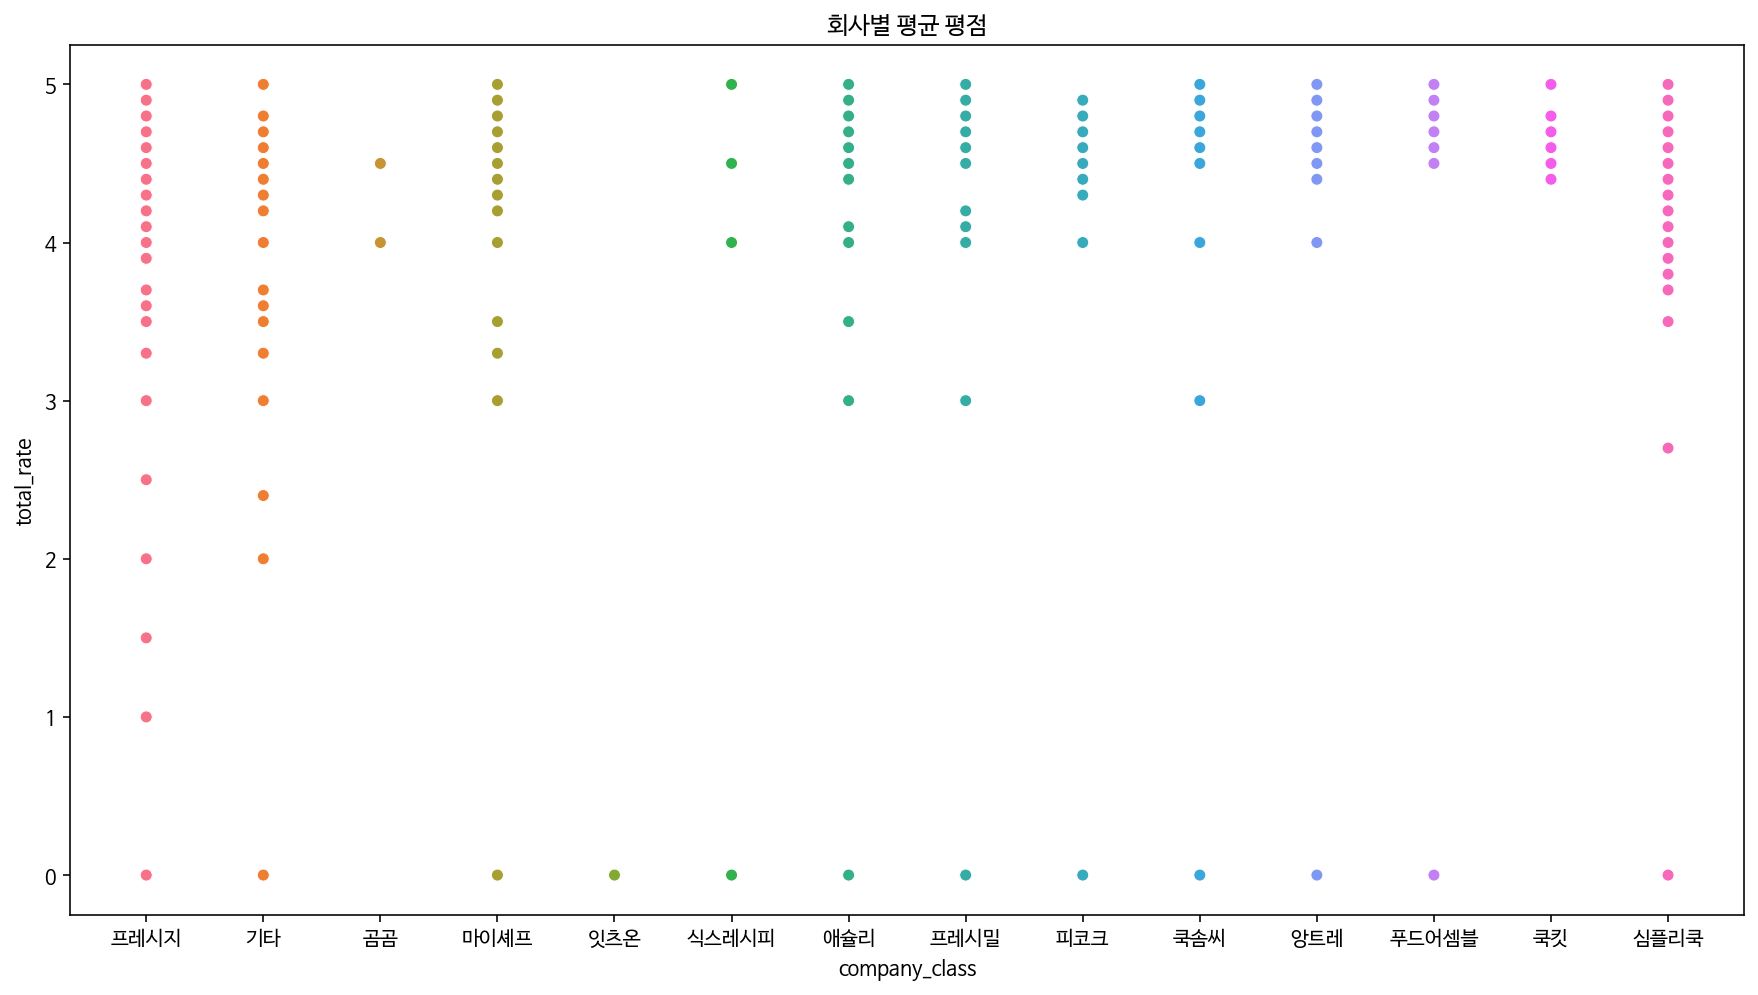

In [ ]:
# 회사별 평점 비교
plt.figure(figsize=(15,8))
sns.scatterplot(x='company_class', y='total_rate', data=new_df, hue='company_class', legend=False)
plt.title('회사별 평균 평점');
plt.axhline(new_df.total_rate.mean(), color='gray', linestyle='--', linewidth='1')
print("전체 평균 별점 :",round(new_df.total_rate.mean(),2))

- 프레시지, 기타는 3점 이하가 꽤 있는편
- 푸드어셈블, 쿡킷은 평점이 좋은 편
- 피코크는 의외로 5점 분포가 적음

## 2. 리뷰 분석

In [ ]:
# 리뷰 토큰화 합치기
review = df[['company','title','data','total_review','total_rate','company_class']].merge(token[['company','title','review_token','data']], on=['company','title','data'])
review.head()

,company,title,data,total_review,total_rate,company_class,review_token
0,매드포갈릭,갈릭 스테이크,emartmall,1,5.0,기타,"매드,포,갈릭,갈릭,스테이크,맛있다,있다,좋다"
1,프레시지,갈릭 시즈닝 스테이크,naver,1082,4.6,프레시지,"선택,갈릭,닝,스테이크,평소,이마트,새벽,배송,배달,주말,포함,상태,괜찮다,냉동,바..."
2,매드포갈릭,갈릭 시즐링 라이스,emartmall,4,5.0,기타,"메드포,갈릭,즐링,라이스,매장,메뉴,밀,키트,간단하다,좋다,거,진짜,맛있다,매장,맛..."
3,프레시지,감바스 알 아히요,naver,24849,4.6,프레시지,"달,사용,야외,거,와인,안주,해,맛있다,빵,넉넉하다,같다,인기,준,요,진짜,맛있다,..."
4,기타,감바스 오일 파스타,emartmall,1,5.0,기타,"맛있다,파스타,육수,정말,좋다"


In [ ]:
# 빈출 상위 50개 단어
from collections import Counter
ls = ''.join(review.review_token.to_list()).split(',')
word = []
cnt = []
for i in Counter(ls).most_common(50):
  word.append(i[0])
  cnt.append(i[1])

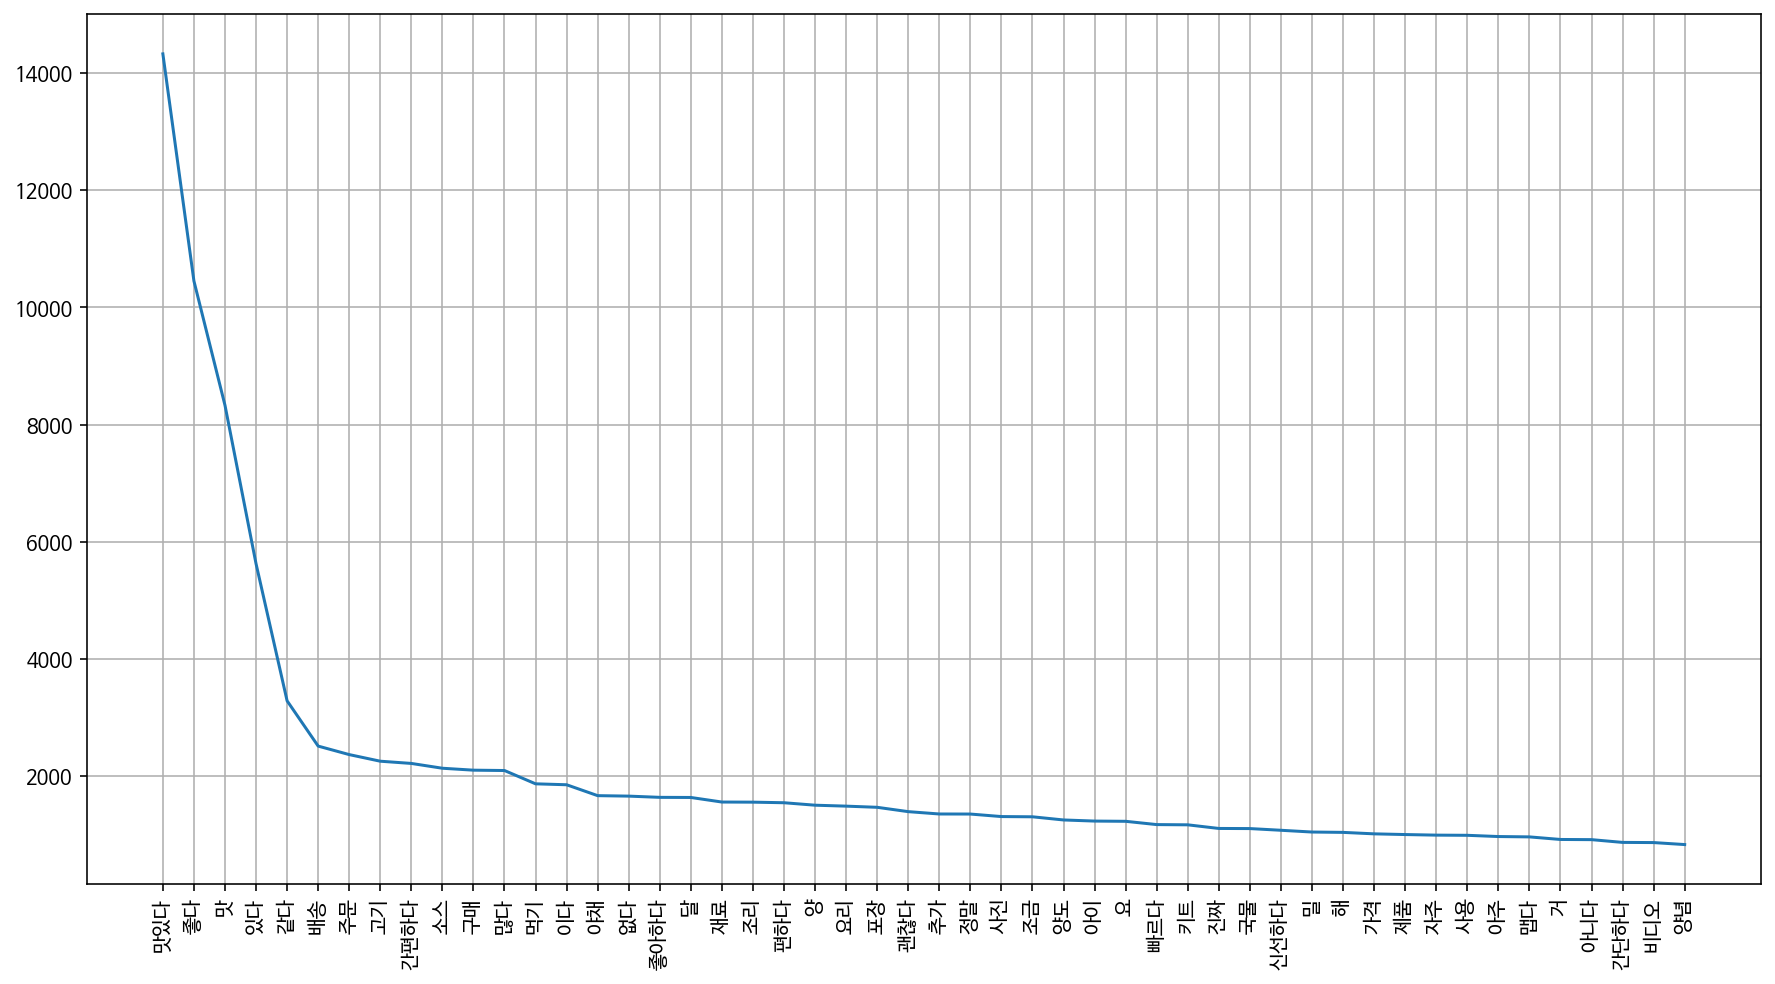

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x=word, y=cnt)
plt.xticks(rotation = 90)
plt.grid();

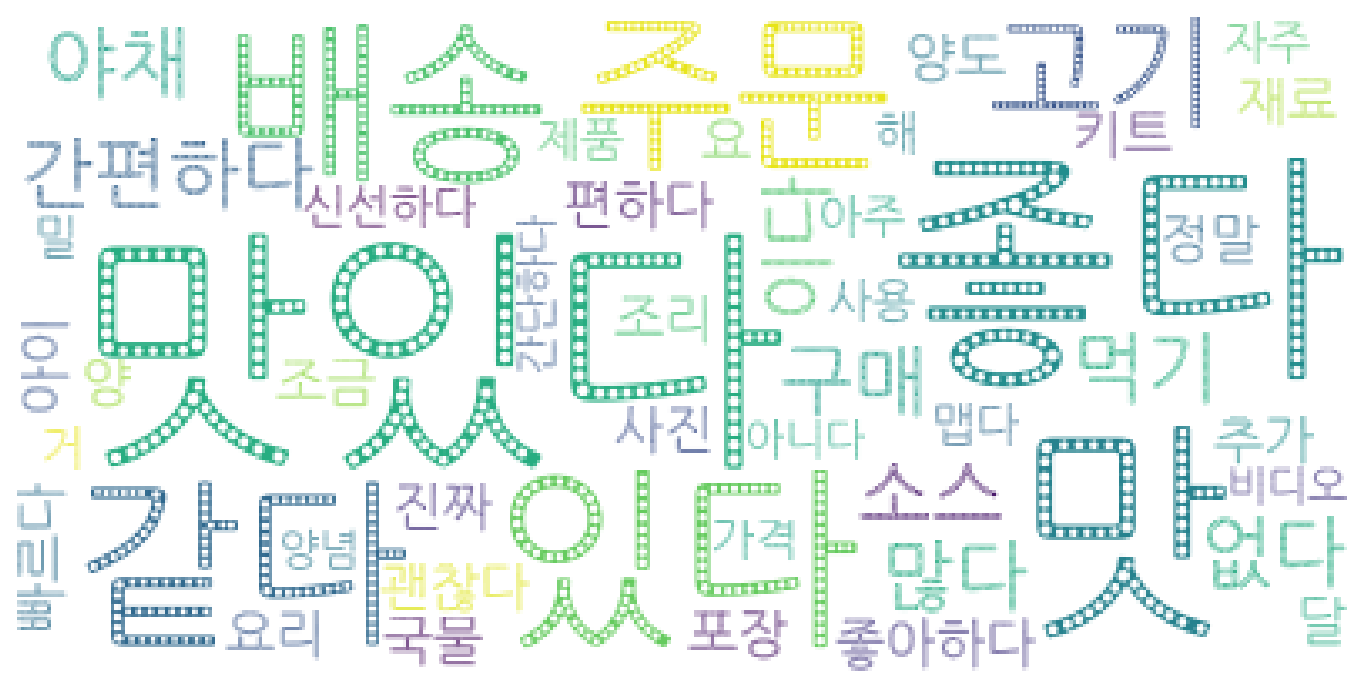

In [ ]:
from wordcloud import WordCloud
%config InlineBackend.figure_format='retina'

data = Counter(ls).most_common(50)

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
wc = WordCloud(font_path=path, relative_scaling=0.2, background_color='#FFFFFF').generate_from_frequencies(dict(data))

plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

- 맛, 배송, 신선도 등 다양한 단어

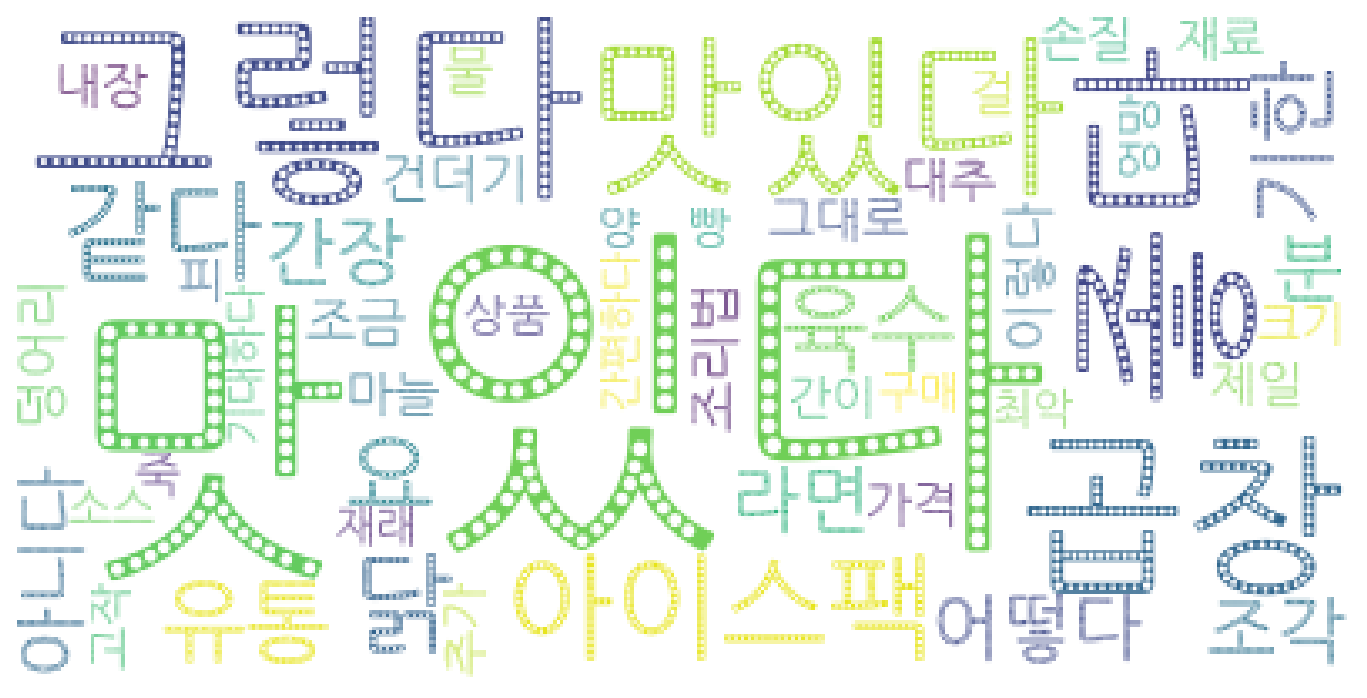

In [ ]:
# 리뷰 4점 미만 상품 단어 분석
%config InlineBackend.figure_format='retina'

less = review[(review['total_rate'] < 3.5) & (review['total_rate'] > 0)]
ls_ = ''.join(less.review_token.to_list()).split(',')
data = Counter(ls_).most_common(50)

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
wc = WordCloud(font_path=path, relative_scaling=0.2, background_color='#FFFFFF').generate_from_frequencies(dict(data))

plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

- 포장, 양, 유통기한에 대한 불만이 다수 보인다.

## 3. Top 50 분석

In [ ]:
top_50 = df.groupby(['company', 'title','company_class']).agg({'total_rate': 'min', 'total_review': 'sum'}).sort_values(by='total_review',ascending=False).reset_index()[:50]
top_50.head()

,company,title,company_class,total_rate,total_review
0,피코크,고수의 맛집 초마짬뽕,피코크,4.7,57118
1,프레시지,블랙라벨 스테이크 세트,프레시지,4.0,31836
2,프레시지,밀푀유 나베,프레시지,4.0,28126
3,프레시지,감바스 알 아히요,프레시지,4.6,25319
4,마이셰프,밀푀유 나베,마이셰프,4.6,22081


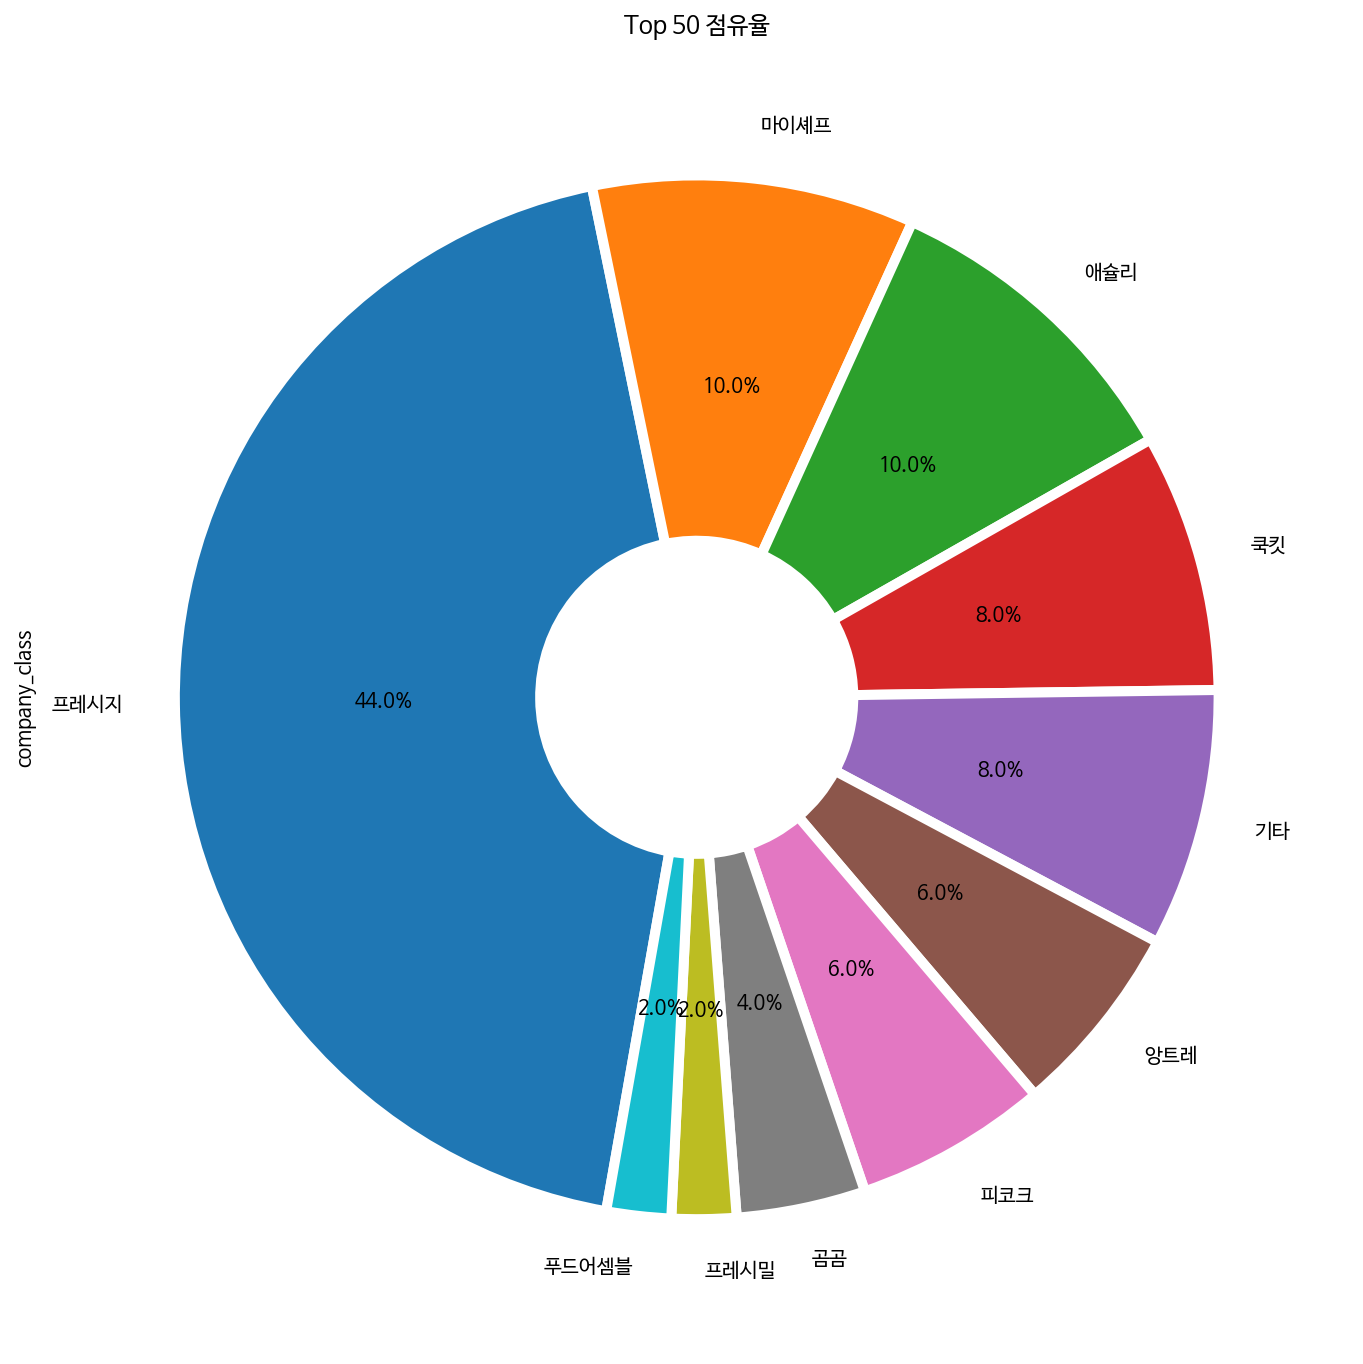

In [ ]:
# 리뷰순 Top 50 분석
plt.figure(figsize=(12,12))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
top_50.company_class.value_counts().plot(kind='pie',autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
plt.title('Top 50 점유율');

- 프레시지 제품이 대중화 되어 있는만큼, 리뷰순 상위 Top 50, 44% 점유율

In [ ]:
# 카테고리별 분류
category = ['중식', '양식', '일식', '양식', '일식', '양식', '한식', '양식', '한식', '중식',
            '중식', '양식', '한식', '한식', '양식', '양식', '중식', '양식', '한식', '한식',
            '양식', '양식', '양식', '한식', '양식', '한식', '한식', '일식', '한식', '중식',
            '양식', '아시안','중식', '일식', '한식', '일식', '양식', '양식', '양식', '한식',
            '한식', '한식', '한식', '한식', '한식', '아시안', '한식','양식','한식','양식']

top_50['type'] = category

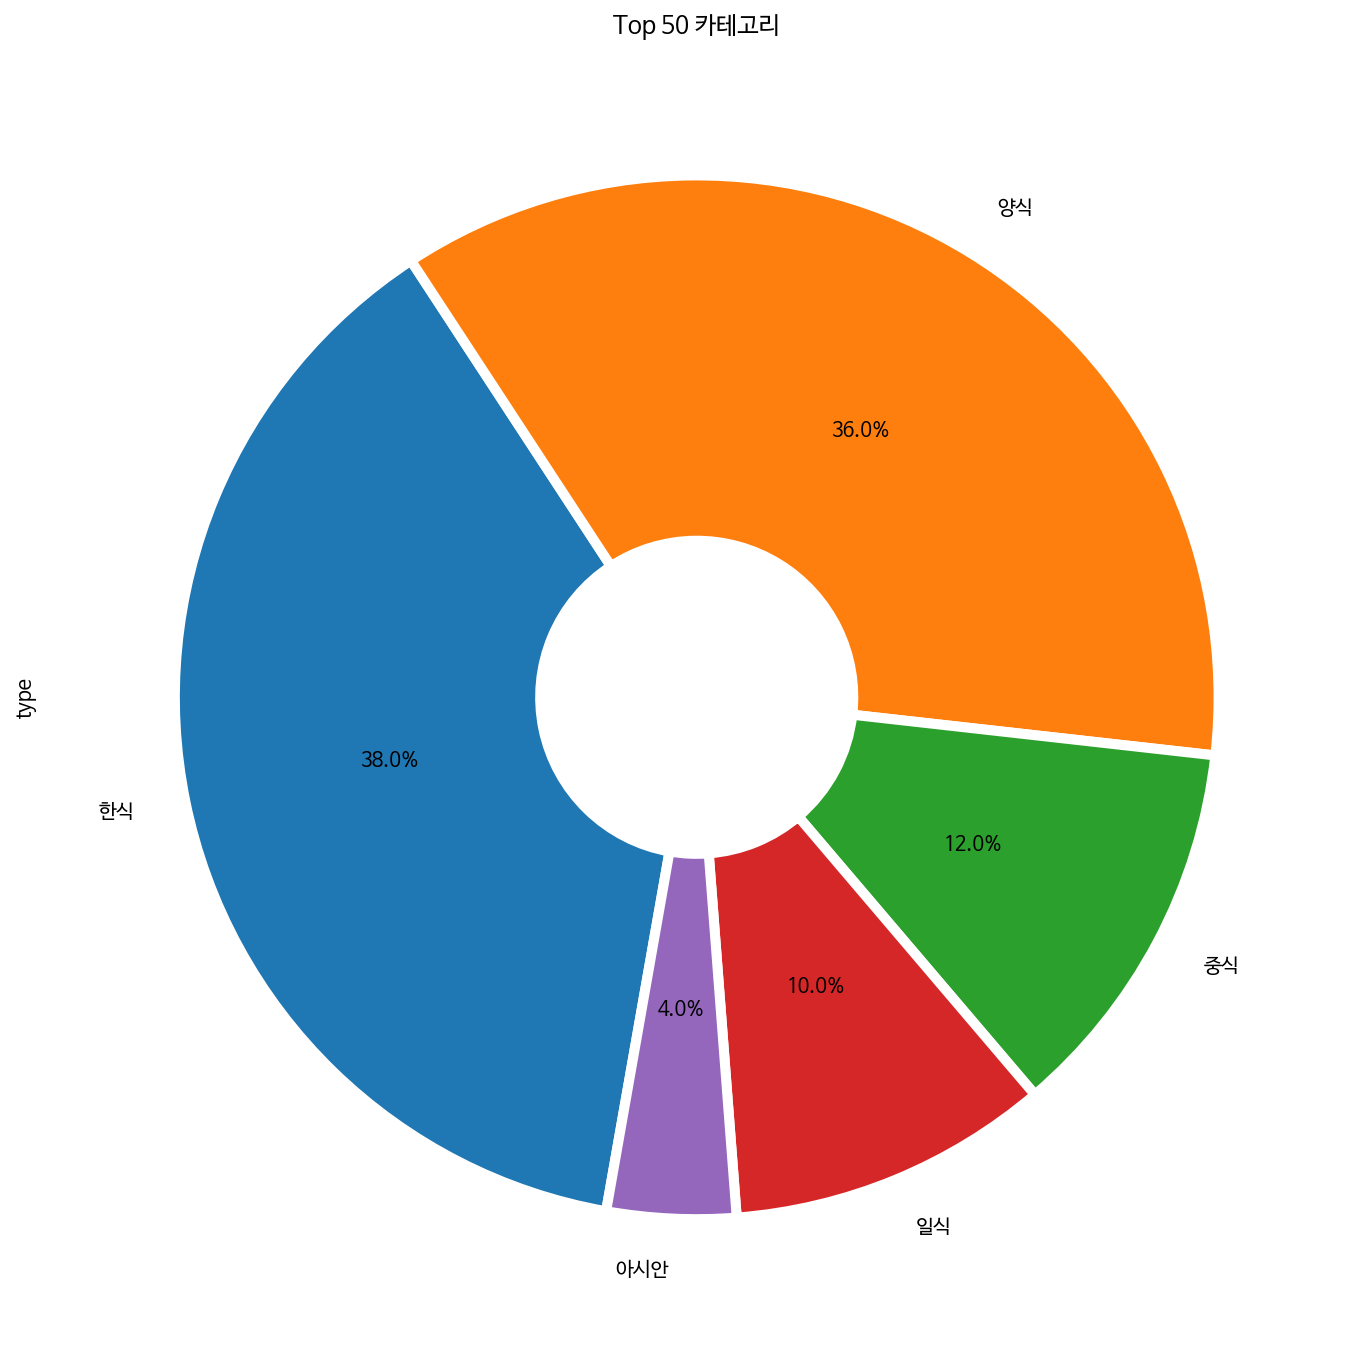

In [ ]:
plt.figure(figsize=(12,12))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
top_50.type.value_counts().plot(kind='pie',autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
plt.title('Top 50 카테고리');

In [ ]:
top_50.groupby(['type','title']).agg({'total_rate': 'min', 'total_review': 'sum'})

total_rate  total_review
type title                                           
아시안  우삼겹 듬뿍 베트남 쌀국수                 4.7          4151
     월남쌈                            4.7          4945
양식   감바스 알 아히요                      4.6         25319
     감바스 피칸테                        4.7          7876
     감바스알아히요                        4.7         14241
     더큰 밀푀유 나베                      4.5         16203
     더큰 블랙라벨 스테이크 세트                4.5          5029
     마라감바스                          4.5          4005
     명란 파스타                         4.0          4492
     몬스터 치즈 프라이                     4.5         13048
     봉골레 크림 빠네 파스타                  4.7         10768
     부채살 찹스테이크                      4.7         11781
     블랙라벨 스테이크 세트                   4.0         31836
     블랙라벨 파히타                       4.5          4563
     빠네크림파스타                        4.8          3851
     소고기 찹스테이크                      4.6          6954
     쉬림프 로제 파스타                     4.5         17581
     올라 파히타                         4.7          9922
     찹스테이크                          4.0          4522
일식   매콤 밀푀유 나베                      4.7          4678
     밀푀유 나베                         4.0         54828
     밀푀유나베 & 칼국수                    4.5          5734
중식   고수의 맛집 진진 멘보샤                  4.7         13203
     고수의 맛집 초마짬뽕                    4.7         57118
     깐쇼새우 칠리새우                      4.6          5420
     마라탕                            4.5         13973
     사천 마라탕                         4.5          9963
     얼큰한 해물 누룽지탕                    4.5          4833
한식   갑오징어 초무침                       4.5         13045
     고깃집 된장찌개                       4.5          8003
     고래사 어묵탕                        4.7          4492
     궁중식 찜닭 밀키트                     4.5         16247
     누룽지 백숙                         4.5          4259
     닭한마리와 칼국수                      4.8         15676
     당면듬뿍 매콤 안동찜닭                   4.6          9194
     매콤 깻잎 순대볶음                     4.5          4376
     삼원가든 LA 꽃갈비 600g               4.7          4670
     서울식 불고기 전골                     4.5          7045
     소고기 샤브샤브                       4.5         12407
     신선한 알이 듬뿍 알탕                   4.5          4325
     연탄불고기 고추장                      4.0          4043
     우삼겹 순두부찌개                      4.5          5829
     장칼국수                           4.5          3868
     정통 순두부찌개 + 짬뽕 순두부찌개 세트         4.5          5660
     차돌박이 숙주볶음                      4.5          6489
     호로록 우삼겹 떡볶이                    4.7          4455
     화요옥  꽃만두전골                     4.6          4427

- 양식은 파스타, 감바스, 스테이크 다수
- 한식은 된장찌개 같은 집밥부터 찜닭, 갈비와 같은 메인 요리까지 스펙트럼이 넓음

# 추천

## 1. TF-IDF (재료)

### 1) 전체

In [ ]:
# 토큰 + 평점 + 리뷰
token = token.merge(df.groupby(['company', 'title']).agg({'total_rate': 'min', 'total_review': 'sum'}).reset_index(), on=['company','title'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# TF-IDF 모델
tfidf = TfidfVectorizer()
dtm = tfidf.fit_transform(token.ingre_token)

# 코사인 유사도
cosine_sim = linear_kernel(dtm, dtm)

In [ ]:
# 비슷한 재료 10가지 품목 추천 함수
def get_recommendations(company_, title_):

  # 회사, 제품명으로 인덱스 검색
  idx = token[(token.company==company_) & (token.title==title_)].index[0]
  # 코사인 유사도 높은 순서대로 10개 반환
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:11]
  # 인덱스로 찾기
  indices_ls = [i[0] for i in sim_scores]
  return token.loc[indices_ls,['company','title','total_rate']]

In [ ]:
get_recommendations('마이셰프','밀푀유 나베')

,company,title,total_rate
84,마이셰프,마라 밀푀유나베,4.5
123,마이셰프,월남쌈,4.7
95,마이셰프,볼케이노 나베,4.5
112,마이셰프,순살 족발덮밥,4.7
510,피코크,샤브샤브,4.8
109,마이셰프,소고기 숙주볶음,4.5
61,마이셰프,나혼자 밀푀유 샤브전골,4.6
67,마이셰프,냉골뱅이 물회와 국수,4.5
378,프레시지,밀푀유 나베,4.0
96,마이셰프,부엔 까르네 스테이크,4.6


In [ ]:
get_recommendations('프레시지','고깃집 된장찌개')

,company,title,total_rate
435,프레시지,우삼겹 청국장찌개,4.0
434,프레시지,우삼겹 순두부찌개,4.5
328,프레시밀,애호박 된장찌개,4.5
439,프레시지,장칼국수,4.5
444,프레시지,짬뽕 순두부찌개,4.0
106,마이셰프,소고기 가득 된장찌개,5.0
502,피코크,된장찌개,4.9
332,프레시지,the EASY 단짠 제육볶음,4.6
322,프레시밀,바지락 된장찌개,5.0
404,프레시지,서울식 불고기 전골,4.5


- 코사인 유사도가 높은 순서대로 출력

### 2) 최대 token 수 지정

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# TF-IDF 모델
tfidf = TfidfVectorizer(max_features=15)
dtm = tfidf.fit_transform(token.ingre_token)

# 코사인 유사도
cosine_sim = linear_kernel(dtm, dtm)

In [ ]:
get_recommendations('마이셰프','밀푀유 나베')

,company,title,total_rate
378,프레시지,밀푀유 나베,4.0
84,마이셰프,마라 밀푀유나베,4.5
272,푸드어셈블,고추잡채&꽃빵,4.7
97,마이셰프,불고기 찜 샐러드,0.0
510,피코크,샤브샤브,4.8
95,마이셰프,볼케이노 나베,4.5
280,푸드어셈블,명가 차돌 순두부찌개,4.6
101,마이셰프,사와디캅 팟타이,4.5
275,푸드어셈블,기장 둘째이모 미역국,4.8
123,마이셰프,월남쌈,4.7


In [ ]:
get_recommendations('프레시지','고깃집 된장찌개')

,company,title,total_rate
344,프레시지,고깃집 된장찌개,4.5
365,프레시지,매콤 밀푀유 나베,4.7
395,프레시지,비프 팟타이,4.6
406,프레시지,소고기 야끼소바,4.5
434,프레시지,우삼겹 순두부찌개,4.5
468,프레시지,피에스타 스테이크,4.6
504,피코크,마라샹궈,4.6
363,프레시지,마라탕,4.5
405,프레시지,소고기 샤브샤브,4.5
373,프레시지,몬스터 치즈 프라이,4.5


## 2. TF-IDF (리뷰)

### 1) 전체

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# TF-IDF 모델
tfidf = TfidfVectorizer()
dtm = tfidf.fit_transform(token.review_token)

# 코사인 유사도
cosine_sim = linear_kernel(dtm, dtm)

In [ ]:
get_recommendations('마이셰프','밀푀유 나베')

,company,title,total_rate
378,프레시지,밀푀유 나베,4.0
309,푸드어셈블,채선당 밀푀유나베,4.7
365,프레시지,매콤 밀푀유 나베,4.7
405,프레시지,소고기 샤브샤브,4.5
92,마이셰프,버섯가득 소불고기전골,4.8
123,마이셰프,월남쌈,4.7
209,앙트레,정통 스키야끼,4.6
366,프레시지,매콤 밀푀유나베 세트,4.7
119,마이셰프,알마니 알탕,4.6
61,마이셰프,나혼자 밀푀유 샤브전골,4.6


In [ ]:
get_recommendations('프레시지','고깃집 된장찌개')

,company,title,total_rate
351,프레시지,구수한 버섯 된장찌개,4.6
404,프레시지,서울식 불고기 전골,4.5
121,마이셰프,우삼겹 된장찌개,4.8
361,프레시지,돼지고기 짜글이,0.0
406,프레시지,소고기 야끼소바,4.5
131,마이셰프,찹스테이크,4.0
407,프레시지,소고기 찹스테이크,4.6
434,프레시지,우삼겹 순두부찌개,4.5
194,앙트레,버터 쉬림프 로제 파스타,4.6
277,푸드어셈블,돼지고기 고추장찌개,4.7


### 2) 최대 token 수 지정

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# TF-IDF 모델
tfidf = TfidfVectorizer(max_features=15)
dtm = tfidf.fit_transform(token.review_token)

# 코사인 유사도
cosine_sim = linear_kernel(dtm, dtm)

In [ ]:
get_recommendations('마이셰프','밀푀유 나베')

,company,title,total_rate
365,프레시지,매콤 밀푀유 나베,4.7
197,앙트레,사천 마라탕,4.4
140,마이셰프,트러플 불고기 솥밥,4.7
461,프레시지,파빌리온 얼큰 소고기 전골,4.5
124,마이셰프,인생 닭갈비,4.6
273,푸드어셈블,궁중떡볶이와 불고기 주먹밥,4.6
460,프레시지,파빌리온 양갈비 스테이크,4.6
366,프레시지,매콤 밀푀유나베 세트,4.7
309,푸드어셈블,채선당 밀푀유나베,4.7
264,쿡솜씨,오삼불고기,4.7


In [ ]:
get_recommendations('프레시지','고깃집 된장찌개')

,company,title,total_rate
361,프레시지,돼지고기 짜글이,0.0
406,프레시지,소고기 야끼소바,4.5
352,프레시지,기사식당 돼지불고기,4.6
308,푸드어셈블,징기스 양갈비 스테이크,4.7
367,프레시지,매콤 콩나물 돼지불고기,4.6
336,프레시지,the EASY 서울식 간장 닭갈비,0.0
92,마이셰프,버섯가득 소불고기전골,4.8
57,마이셰프,궁중 소불고기,4.5
64,마이셰프,냄비가득 5분 고기 김치찌개,4.5
444,프레시지,짬뽕 순두부찌개,4.0


## 3. TF-IDF (재료 + 리뷰)

### 1) 전체

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# TF-IDF 모델
tfidf = TfidfVectorizer()
dtm = tfidf.fit_transform(token.total_token)

# 코사인 유사도
cosine_sim = linear_kernel(dtm, dtm)

In [ ]:
get_recommendations('마이셰프','밀푀유 나베')

,company,title,total_rate
378,프레시지,밀푀유 나베,4.0
365,프레시지,매콤 밀푀유 나베,4.7
309,푸드어셈블,채선당 밀푀유나베,4.7
405,프레시지,소고기 샤브샤브,4.5
61,마이셰프,나혼자 밀푀유 샤브전골,4.6
92,마이셰프,버섯가득 소불고기전골,4.8
506,피코크,밀푀유 나베,0.0
366,프레시지,매콤 밀푀유나베 세트,4.7
123,마이셰프,월남쌈,4.7
209,앙트레,정통 스키야끼,4.6


In [ ]:
get_recommendations('프레시지','고깃집 된장찌개')

,company,title,total_rate
351,프레시지,구수한 버섯 된장찌개,4.6
404,프레시지,서울식 불고기 전골,4.5
121,마이셰프,우삼겹 된장찌개,4.8
406,프레시지,소고기 야끼소바,4.5
407,프레시지,소고기 찹스테이크,4.6
361,프레시지,돼지고기 짜글이,0.0
277,푸드어셈블,돼지고기 고추장찌개,4.7
434,프레시지,우삼겹 순두부찌개,4.5
502,피코크,된장찌개,4.9
293,푸드어셈블,소불고기,4.6


### 2) 최대 token 수 지정

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# TF-IDF 모델
tfidf = TfidfVectorizer(max_features=15)
dtm = tfidf.fit_transform(token.total_token)

# 코사인 유사도
cosine_sim = linear_kernel(dtm, dtm)

In [ ]:
get_recommendations('마이셰프','밀푀유 나베')

,company,title,total_rate
365,프레시지,매콤 밀푀유 나베,4.7
140,마이셰프,트러플 불고기 솥밥,4.7
209,앙트레,정통 스키야끼,4.6
124,마이셰프,인생 닭갈비,4.6
461,프레시지,파빌리온 얼큰 소고기 전골,4.5
395,프레시지,비프 팟타이,4.6
460,프레시지,파빌리온 양갈비 스테이크,4.6
264,쿡솜씨,오삼불고기,4.7
273,푸드어셈블,궁중떡볶이와 불고기 주먹밥,4.6
393,프레시지,블랙라벨 파히타,4.5


In [ ]:
get_recommendations('프레시지','고깃집 된장찌개')

,company,title,total_rate
361,프레시지,돼지고기 짜글이,0.0
406,프레시지,소고기 야끼소바,4.5
308,푸드어셈블,징기스 양갈비 스테이크,4.7
352,프레시지,기사식당 돼지불고기,4.6
367,프레시지,매콤 콩나물 돼지불고기,4.6
336,프레시지,the EASY 서울식 간장 닭갈비,0.0
57,마이셰프,궁중 소불고기,4.5
92,마이셰프,버섯가득 소불고기전골,4.8
444,프레시지,짬뽕 순두부찌개,4.0
370,프레시지,메밀소바,0.0


# 사용자기반 추천

- 사용자 데이터가 없으므로, 리뷰남긴 고객의 마킹된 아이디를 사용자로 가정하고 진행

## surprise

- 추천 시스템 구현을 도와주는 라이브러리
- 알고리즘 : KNN(최근접 이웃) 기반 또는 SVD(잠재요인 행렬분할) 기반으로 모델 선정, 학습

In [ ]:
emart = pd.read_csv('emartmall_review_.csv',index_col=0)
naver = pd.read_csv('naver_review_.csv',index_col=0)

In [ ]:
print(emart.shape, naver.shape)

(16876, 7) (32093, 7)


In [ ]:
# 2개 이상 리뷰 남긴 고객만 추출 (이마트)
more = emart.id.value_counts()>1
more_df=pd.DataFrame(more).reset_index()
id_ls = more_df[more_df['id']== True]['index'].to_list()
emart = emart[emart['id'].isin(id_ls)]
print(emart.shape)

(14909, 7)


In [ ]:
# 2개 이상 리뷰 남긴 고객만 추출 (네이버)
more = naver.id.value_counts()>1
more_df=pd.DataFrame(more).reset_index()
id_ls = more_df[more_df['id']== True]['index'].to_list()
naver = naver[naver['id'].isin(id_ls)]
print(naver.shape)

(25568, 7)


In [ ]:
# 이마트리뷰 + 네이버리뷰
user = pd.concat([emart, naver])[['company','title','id','rate']].reset_index(drop=True)
user.head()

,company,title,id,rate
0,전주 메르밀진미집,냉소바,dps*******,1.0
1,전주 메르밀진미집,냉소바,LEE*******,5.0
2,전주 메르밀진미집,냉소바,LEE*******,5.0
3,전주 메르밀진미집,냉소바,mut*******,1.0
4,전주 메르밀진미집,냉소바,coo*******,5.0


In [ ]:
# 회사명 + 품명
total_title = []
for i in range(len(user.company)):
  total_title.append(user.company[i]+','+ user.title[i])
user['new_title'] = total_title
user = user[['id','new_title','rate']]

In [ ]:
# 딕셔너리 형태로 변환
def retro_dictify(frame):
    d = {}
    for row in frame.values:
        here = d
        for elem in row[:-2]:
            if elem not in here:
                here[elem] = {}
            here = here[elem]
        here[row[-2]] = row[-1]
    return d
df_to_dict = retro_dictify(user)

In [ ]:
# 파일간 연결고리
name_list = []
item_set = set()

In [ ]:
for user_key in df_to_dict:
  name_list.append(user_key)

  for item_key in df_to_dict[user_key]:
    item_set.add(item_key)

In [ ]:
item_list = list(item_set)

In [ ]:
# surprise 형식에 맞게 데이터 변환
rating_dic = {'userID':[],
              'itemID':[],
              'rating':[]}

In [ ]:
for name_key in df_to_dict:
  for item_key in df_to_dict[name_key]:
    a1 = name_list.index(name_key)
    a2 = item_list.index(item_key)
    a3 = df_to_dict[name_key][item_key]

    rating_dic['userID'].append(a1)
    rating_dic['itemID'].append(a2)
    rating_dic['rating'].append(a3)

In [ ]:
print(len(rating_dic['userID']))
print(len(rating_dic['itemID']))
print(len(rating_dic['rating']))

35551
35551
35551


In [ ]:
# 변환된 데이터
df = pd.DataFrame(rating_dic)
df.head()

,userID,itemID,rating
0,0,288,1.0
1,0,567,5.0
2,0,390,5.0
3,0,561,1.0
4,0,59,5.0


In [ ]:
!pip install surprise

     |████████████████████████████████| 11.8 MB 52 kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617729 sha256=196a1de7dd33b8bfcc06a852e35fc7cd2baaadd7f486cf599b9c2664de590ff2
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from surprise import Reader

# 포맷 지정, rating_scale로 최소-최대 평점 범위 지정
reader = Reader(rating_scale=(1,5))
reader

In [ ]:
# 데이터 로드
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import SVD

# 반드시 '사용자-아이템-평점' 변수명 순서 맞추기
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

# train-test set 분리
train, test = train_test_split(data, test_size=0.25,random_state=42)

# 수행시마다 동일한 결과 도출을 위해 random_state 설정 
algo = SVD(random_state=0) 

# 학습 데이터 세트로 학습
algo.fit(train) 

# 테스트 데이터 세트로 평점 예측 후 RMSE 평가 
predictions = algo.test(test) 
accuracy.rmse(predictions)

RMSE: 0.8015


0.8014820944460164

In [ ]:
print('prediction 결과값 5개 미리보기')
for i in predictions[:5]:
  print(i)

prediction 결과값 5개 미리보기
user: 4524       item: 201        r_ui = 4.00   est = 4.65   {'was_impossible': False}
user: 1412       item: 8          r_ui = 5.00   est = 4.85   {'was_impossible': False}
user: 41         item: 97         r_ui = 5.00   est = 4.75   {'was_impossible': False}
user: 1249       item: 125        r_ui = 5.00   est = 4.58   {'was_impossible': False}
user: 3347       item: 117        r_ui = 4.00   est = 4.55   {'was_impossible': False}


- user : user_id
- item : item_id
- r_ui : rating
- est : predicted rating

In [ ]:
# GridSearchCV로 최대 성능 구현하기
from surprise.model_selection import GridSearchCV 

param_grid = {'n_epochs': [10, 15, 20, 25], 'n_factors': [20, 30, 40]} 

# CV를 3개 폴드 세트로 지정, 성능 평가는 rmse, mse 로 수행 하도록 GridSearchCV 구성 
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3) 
gs.fit(data) 

# 최고 RMSE Evaluation 점수와 그때의 하이퍼 파라미터 
print(gs.best_score['rmse']) 
print(gs.best_params['rmse'])

0.7795848812708995
{'n_epochs': 20, 'n_factors': 20}


In [ ]:
# 최종 모델

#전체 데이터를 학습데이터로 생성
trainset = data.build_full_trainset() 
algo = SVD(n_epochs=20, n_factors=20, random_state=42) 
algo.fit(trainset)

In [ ]:
# 예측 데이터
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

In [ ]:
# 예측 평점 높은 순서대로 10개 리턴하는 함수
from collections import defaultdict

def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [ ]:
top_n = get_top_n(predictions, n=10)

# 각 유저에 추천하는 아이템 10가지
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
3204 [54, 52, 208, 506, 100, 82, 363, 271, 305, 0]
3205 [259, 506, 208, 54, 52, 557, 82, 43, 348, 316]
3206 [259, 506, 52, 54, 516, 221, 305, 474, 311, 77]
3207 [52, 402, 208, 506, 60, 457, 305, 176, 373, 152]
3208 [506, 305, 166, 52, 516, 445, 208, 152, 46, 363]
3209 [259, 152, 311, 453, 506, 221, 305, 176, 138, 516]
3210 [52, 348, 77, 506, 259, 516, 54, 60, 82, 136]
3211 [54, 110, 82, 52, 50, 208, 77, 176, 244, 406]
3212 [506, 186, 516, 259, 221, 110, 34, 422, 101, 52]
3213 [305, 402, 575, 506, 516, 52, 445, 54, 193, 100]
3214 [506, 259, 52, 516, 244, 176, 54, 34, 186, 348]
3215 [506, 52, 259, 402, 436, 198, 60, 77, 244, 305]
3216 [176, 54, 100, 305, 516, 125, 421, 52, 136, 530]
3217 [506, 52, 54, 516, 208, 348, 193, 402, 259, 539]
3218 [52, 516, 363, 445, 259, 173, 152, 550, 208, 421]
3219 [516, 506, 54, 305, 173, 221, 573, 153, 50, 517]
3220 [506, 52, 259, 176, 244, 353, 208, 436, 305, 54]
3221 [305, 506, 186, 152, 516, 100, 363, 575, 127, 348]
3

In [ ]:
user.tail()

,id,new_title,rate
40472,soni****,"애슐리,해물 누룽지탕",5.0
40473,godq****,"애슐리,해물 누룽지탕",5.0
40474,love****,"애슐리,해물 누룽지탕",5.0
40475,sunn****,"애슐리,해물 누룽지탕",5.0
40476,emil****,"애슐리,해물 누룽지탕",5.0


In [ ]:
# 유저 입력시 추천 값 리턴
who = input('1. id를 입력하세요: ')
index = name_list.index(who)
print()
print(f'2. {who}님께서 구매하신 밀키트 품목입니다.')
print([i for i in set(user[user.id==who].new_title.to_list())])
print()
print(f'3. {who}님께 추천드리는 밀키트 상품입니다.')
for id, item in top_n[index]:
  print('상품명 : ',item_list[id], ', 예상 평점 : ',item)

1. id를 입력하세요: sunn****

2. sunn****님께서 구매하신 밀키트 품목입니다.
['프레시지,매콤한 시래기 코다리조림', '마이셰프,집콕 놀이 세트', '마이셰프,인생 닭갈비', '애슐리,콘치즈 바비큐 치킨 ', '마이셰프,냉골뱅이 물회와 국수', '프레시지,참오징어젓', '애슐리,해물 누룽지탕 ', '마이셰프,사와디캅 팟타이', '마이셰프,순살 족발덮밥', '애슐리,스테이크 로제 빠네 파스타 ', '마이셰프,두근두근 홈파티세트 밀키트', '마이셰프,눈꽃 함박 스테이크', '프레시지,장칼국수', '프레시지,이화횟집 낙지 전골', '프레시지,마라탕', '마이셰프,보니따 리꼬 스테이크', '푸드어셈블,명가 고깃집 된장찌개   ', '애슐리,감바스 피칸테 ', '프레시지,우삼겹 청국장찌개']

3. sunn****님께 추천드리는 밀키트 상품입니다.
상품명 :  마이셰프,매콤칼칼 아귀찜 , 예상 평점 :  4.984897544773569
상품명 :  미국 NOM,부대찌개  , 예상 평점 :  4.9217395555507215
상품명 :  프레시밀,투움바 파스타 , 예상 평점 :  4.9164198000689945
상품명 :  프레시지,밀푀유 나베 , 예상 평점 :  4.9061754813690985
상품명 :  프레시지,우아한 홈파티 세트  , 예상 평점 :  4.88985773440862
상품명 :  기타,밀푀유나베 + 모둠야채 , 예상 평점 :  4.8884210038296985
상품명 :  푸드어셈블,클라우드 스테이크 , 예상 평점 :  4.887142379405121
상품명 :  푸드어셈블,오징어볶음  , 예상 평점 :  4.883580437859161
상품명 :  프레시지,밀푀유 나베 세트  , 예상 평점 :  4.879452405392951
상품명 :  기타,옛날감자수제비 , 예상 평점 :  4.866259230580932


# 개선점

- 더욱 폭 넓은 데이터 수집
- 이미지에서 텍스트 변환하는 pytesseract 라이브러리 성능을 높일 수 있는 데이터 수집해서 학습시키기
- surprise 다양한 알고리즘 비교